<a href="https://colab.research.google.com/github/GamingMike45/DataScienceCommittee/blob/main/Copy_of_Titanic_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from re import T
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# how to use google drive #
from google.colab import drive
drive.mount('/content/drive')

# takes the training data spreadsheet (csv) and puts it into two panda arrays #
trainData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Competitions/Titanic/train.csv")
testData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Competitions/Titanic/test.csv")

"""The funtions bellow act on the data"""
# just prints the data
def printData():
  #pd.set_option("display.max_rows", None)
  print(f"Train data=\n{trainData}")
  print(f"Test data=\n{testData}")

# makes the column Family column which is the sum of Sibsp (siblingings/spouses) and Parch (Parens/Children)
def family(trainData, testData):
  trainData["Family"] = trainData["SibSp"] + trainData["Parch"]
  testData["Family"] = testData["SibSp"] + testData["Parch"]

  print("   Created 'Family' column.")


# makes the column Last Name column which is just the peroson last name
def lastName(trainData, testData):
  trainData["LastName"] = trainData["Name"].str.split(',').str[0]
  testData["LastName"] = testData["Name"].str.split(',').str[0]

  print("   Created 'LastName' column.")

def makeFamCodes(trainData, testData):
  trainNameSet = set(trainData["LastName"])
  testNameSet = set(testData["LastName"])

  print(f"THIS IS MY SET {trainNameSet}")

  trainData["FamCode"] = ''
  testData["FamCode"] = ''

  i = 0
  for name in trainNameSet:
    trainData["FamCode"] += trainData["LastName"].apply(lambda s: str(i) if s == name else "")

    i = i + 1

  i = 0
  for name in testNameSet:
    testData["FamCode"] += testData["LastName"].apply(lambda s: str(i) if s == name else "")

    i = i + 1

#trial turning names into numbers to see if there was improvment. Strings of numbers ended up being too long for most algarithems
def NameNumMapping (trainData, testData):
# Define a mapping dictionary
  letter_to_number = {'A': 1, 'a': 1, 'B': 2, 'b': 2, 'C': 3, 'c': 3, 'D': 4, 'd': 4,
                    'E': 5, 'e': 5, 'F': 6, 'f': 6, 'G': 7, 'g': 7, 'H': 8, 'h': 8,
                    'I': 9, 'i': 9, 'J': 10, 'j': 10, 'K': 11, 'k': 11, 'L': 12, 'l': 12,
                    'M': 13, 'm': 13, 'N': 14, 'n': 14, 'O': 15, 'o': 15, 'P': 16, 'p': 16,
                    'Q': 17, 'q': 17, 'R': 18, 'r': 18, 'S': 19, 's': 19, 'T': 20, 't': 20,
                    'U': 21, 'u': 21, 'V': 22, 'v': 22, 'W': 23, 'w': 23, 'X': 24, 'x': 24,
                    'Y': 25, 'y': 25, 'Z': 26, 'z': 26, ',' : 0, '(' : 0, ')' : 0, ' ' : 0,
                    '.' : 27, '"' : 0, "'" : 0, '-' : 0, '/' : 0 }

  trainData['NameNum'] = trainData['Name'].map(lambda name: ''.join(str(letter_to_number[char]) for char in name))
  testData['NameNum'] = testData['Name'].map(lambda name: ''.join(str(letter_to_number[char]) for char in name))


# FILLING in NULLS #
#Takes all the nulls and puts in the mean/average of the col
def wrangleQ0(trainData, testData):
# Extract numerical part from "Cabin" column
  trainData['Cabin'] = trainData['Cabin'].str.extract('(\d+)')
  testData['Cabin'] = testData['Cabin'].str.extract('(\d+)')

# Convert numerical part to numeric type
  trainData['Cabin'] = pd.to_numeric(trainData['Cabin'], errors='coerce')
  testData['Cabin'] = pd.to_numeric(testData['Cabin'], errors='coerce')

# Replace missing values in "Cabin" with mean
  trainData['Cabin'].fillna(trainData['Cabin'].mean(), inplace=True)
  testData['Cabin'].fillna(testData['Cabin'].mean(), inplace=True)

# Extract numerical part from "Ticket" column
  trainData['Ticket'] = trainData['Ticket'].str.extract('(\d+)')
  testData['Ticket'] = testData['Ticket'].str.extract('(\d+)')

# Convert numerical part to numeric type
  trainData['Ticket'] = pd.to_numeric(trainData['Ticket'], errors='coerce')
  testData['Ticket'] = pd.to_numeric(testData['Ticket'], errors='coerce')

# Replace missing values in "Ticket" with mean
  trainData['Ticket'].fillna(trainData['Ticket'].mean(), inplace=True)
  testData['Ticket'].fillna(testData['Ticket'].mean(), inplace=True)

  trainData["Age"] = trainData["Age"].fillna(trainData["Age"].mean())
  testData["Age"] = testData["Age"].fillna(testData["Age"].mean())

  trainData["Fare"] = trainData["Fare"].fillna(trainData["Fare"].mean())
  testData["Fare"] = testData["Fare"].fillna(testData["Fare"].mean())

  print(trainData['Cabin'])

  print("   Nulls Filled.")


# Remove rows with nulls in them #
def wrangleDelNull(trainData, testData):
  trainData.dropna(inplace=True)
  testData.dropna(inplace=True)


from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
def wrangleNorm(trainData, testData, exclude=[]):
  # change this to do all numeric columns!
  tempDF = testData.select_dtypes(include=np.number)
  columns = []

  for col in tempDF.columns:
    if (col not in exclude):
      columns = columns + [col]

  for col in columns:
      trainData[col] = (trainData[col] - trainData[col].min()) / (trainData[col].max() - trainData[col].min())
      testData[col] = (testData[col] - testData[col].min()) / (testData[col].max() - testData[col].min())

  print("   Normalized numeric columns.")


def printData():
  print(f"Train data=\n{trainData}")
  print(f"Test data=\n{testData}")


!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
# This predicts importance of our features #
def predictImportance(trainData):
    tfDataSet = tfdf.keras.pd_dataframe_to_tf_dataset(trainData, label='Survived')

    model = tfdf.keras.RandomForestModel()
    model.fit(tfDataSet)

    print(model.summary())


from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# we probably dont need all these #
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt
# This tests the models #
def testModels(trainData,features):
    print(f"\n{features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])

    names = ["RandomForest200",
         "LinearSVC",
         "MultinomialNB",
         "Logistic",
         "KNN5",
         "SVCLinear",
         "SVCgamma2",
         "DecisionTree5",
         #"RandomForest5-10",
         #"MLP-2000-1000-500-100",
         "AdaBoost",
         "HistGradientBoost",
         "GradientBoosting",  # New model
         "Bagging"            # New model
        ]

    abrevNames = ["RF2",
         "LSVC",
         "MNB",
         "Log",
         "KNN5",
         "SVCL",
         "SVCg",
         "DT5",
         #"RF51",
         #"MLP",
         "AB",
         "HGB",
         "GB",    # New model
         "Bag"    # New model
        ]

    models = [
        RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=0),
        LinearSVC(max_iter=750, dual=True),
        MultinomialNB(),
        LogisticRegression(random_state=5),
        KNeighborsClassifier(n_neighbors=6, weights="uniform"),
        SVC(kernel="linear", C=2.2),
        SVC(gamma=0.34, C=2),
        DecisionTreeClassifier(max_depth=15),
        #RandomForestClassifier(n_estimators=750, max_depth=7, max_features=3),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[]),
        GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=.1),  # New model
        BaggingClassifier(n_estimators=300)            # New model
    ]

    results = []

    i = 0
    for model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        model_name = names[i]
        i = i + 1
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    plt.boxplot(results, labels=abrevNames)
    plt.title('Algorithm Comparison')
    plt.show()


def outPrediction(trainData,testData):
    # what we want to predict #
    y = trainData["Survived"]

    # features that mater!! #
    features = ["Fare","Age",'Pclass','Ticket','Embark',"Cabin"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    model = HistGradientBoostingClassifier(categorical_features=[])
    model.fit(X, y)

    cv_results = cross_val_score(model, X, y, scoring='accuracy')
    result = cv_results
    name = "Hist"
    print()
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print()

    predictions = model.predict(XTest)
    return predictions


def outputPredictionsList(trainData,testData,features):
    print(f"   Using Features: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    models = [
        RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=0),
        LinearSVC(max_iter=750, dual=True),
        MultinomialNB(),
        LogisticRegression(random_state=5),
        KNeighborsClassifier(n_neighbors=6, weights="uniform"),
        SVC(kernel="linear", C=2.2),
        SVC(gamma=0.34, C=2),
        DecisionTreeClassifier(max_depth=15),
        #RandomForestClassifier(n_estimators=750, max_depth=7, max_features=3),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[]),
        GradientBoostingClassifier(n_estimators = 300, max_depth=3, learning_rate=.1),  # New model
        BaggingClassifier(n_estimators=300)            # New model
    ]

    predictionsList = []

    for model in models:
        model.fit(X, y)
        prediction = model.predict(XTest)
        predictionsList.append(prediction)

    return np.array(predictionsList)


def outputConcensus(preditcionsList):
  concensus = np.mean(predictionsList, axis=0)
  #print(concensus)
  return (np.rint(concensus)).astype(int)


# Create an output dataframe and write it to csv file #
def modelToCSV(testData,prediction):
    output = pd.DataFrame({'PassengerId': testData.PassengerId, "Survived": prediction})
    output.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Competitions/Titanic/submission.csv', index=False)

    # just so we can see the submission in the console #
    submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Competitions/Titanic/submission.csv')
    print(submission)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Wrangling...
0       50.49
1       85.00
2       50.49
3      123.00
4       50.49
        ...  
886     50.49
887     42.00
888     50.49
889    148.00
890     50.49
Name: Cabin, Length: 891, dtype: float64
   Nulls Filled.
   Normalized numeric columns.

Creating Features...
   Created 'Family' column.
   Created 'LastName' column.
THIS IS MY SET {'Mionoff', 'Cook', 'Stranden', 'Woolner', 'Youseff', 'Lemberopolous', 'Tornquist', 'Astor', 'Meo', 'Matthews', 'Lobb', 'Dick', 'Aubart', 'Ibrahim Shawah', 'Saalfeld', 'Uruchurtu', 'Blank', 'Serepeca', 'Willey', 'Sutton', 'Porter', 'Thomas', 'McKane', 'Frolicher-Stehli', 'Richard', 'Goncalves', 'Caldwell', 'Waelens', 'Braund', 'Bing', 'Sivic', 'Murphy', 'Perkin', 'Goldenberg', 'Gheorgheff', 'Nilsson', 'Hold', 'LeRoy', 'Minahan', 'Gee', 'Jansson', 'Ahlin', 'Moen', 'Christy', 'Johnson', 'Cameron', 'Pinsky', 'Garfirth', 'Ling', 'Ilett', 'Montvila', 'Chronopoulos', 'Hood', 'Jerwan', 'Lindqvist', 'Carlsson', 'Turcin', 'Niskanen', 'Horgan', 'Dahl

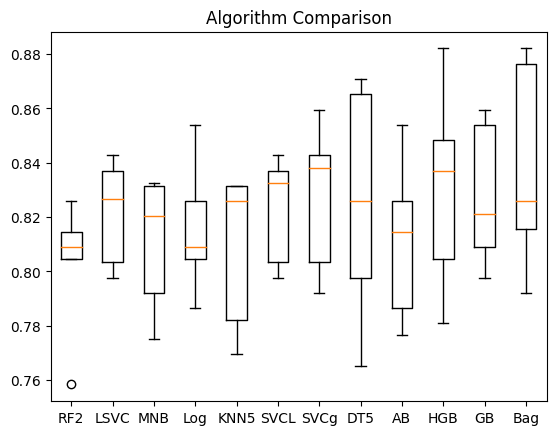


Predicting...
   Using Features: ['Sex', 'Fare', 'Age', 'SibSp', 'Parch']
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
# Function calls below #

# Wrangling #
print('\nWrangling...')
wrangleQ0(trainData, testData)
#wrangleDelNull(trainData, testData)
wrangleNorm(trainData, testData, exclude=["PassengerId"])
#printData()

# Feature Enginering #
print('\nCreating Features...')
family(trainData, testData)
lastName(trainData, testData)
makeFamCodes(trainData, testData)
#NameNumMapping (trainData, testData)
printData()
#printData()

# feature sets! #
features = ["Sex","Fare","Age","SibSp","Parch"]
features1 = ["Sex","Fare","Age","SibSp","Parch","Ticket","Embarked"]
features2 = ["Sex","Fare","Age","Family","Pclass","Ticket","Cabin","Embarked","FamCode"]
featuresALL = ["Sex","Fare","Age","Family","Pclass","Name","Ticket","Cabin","Embarked","PassengerId","FamCode"]

predictImportance(trainData)
#testModels(trainData,features)
#testModels(trainData, features1)
testModels(trainData, features2)
#testModels(trainData, featuresALL)

# For submissions #
print('\nPredicting...')
#prediction = outPrediction(trainData, testData)
predictionsList = outputPredictionsList(trainData,testData,features)
#print(predictionsList)
concensus = outputConcensus(predictionsList)
#print(concensus)
modelToCSV(testData,concensus)
